In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Барьерные опционы

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [2]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [3]:
def call_di(S, H, K, T, r, q, sigma):
  if S > H:
    return C + E
  else:
    return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))


print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

down-and-in call =  14.88162080496874


В условиях примера 1 напишите универсальную функцию для оценки стоимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу:
\
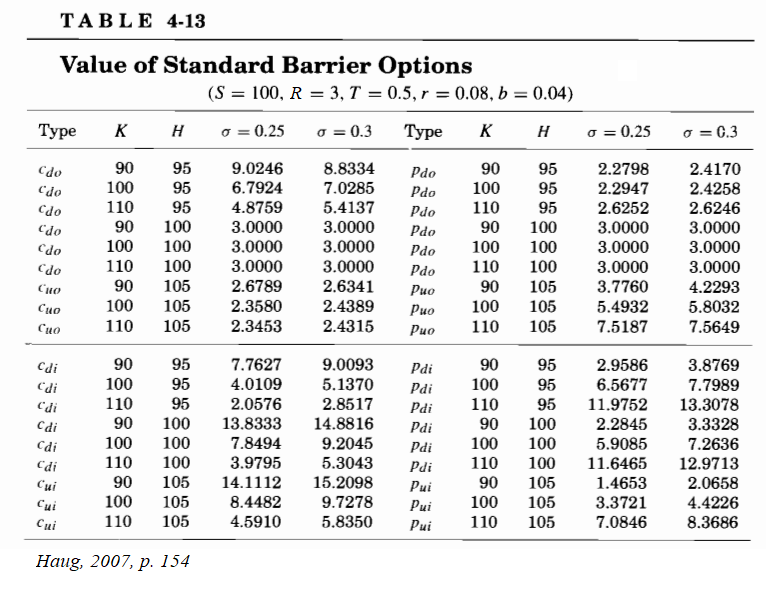

In [4]:
def x1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def x2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def z(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

def A(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def B(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def C(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def D(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def E(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*np.exp(-r*T)*(norm.cdf(eta*x2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T)))

def F(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*((H/S)**(mu+lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta))+(H/S)**(mu-lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta) - 2*eta*lam*sigma*np.sqrt(T)))

def di_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def di_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = -1
        phi = -1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
###
def do_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def do_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call):
    if option_type == "Up-and-out" and is_call == True:
        exact_calc_result = uo_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-out" and is_call == False:
        exact_calc_result = uo_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == True:
        exact_calc_result = do_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == False:
        exact_calc_result = do_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == True:
        exact_calc_result = ui_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == False:
        exact_calc_result = ui_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == True:
        exact_calc_result = di_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == False:
        exact_calc_result = di_barrier_put(S, H, K, R, T, r, b, sigma)
    else:
        print("Unknown option type")
        return
    return exact_calc_result

In [5]:
K = 90
H = 95
sigma = 0.25
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
option_type = "Down-and-out"
is_call = True
barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)

np.float64(9.02456769496686)

## Задача

Задача. Проварьируйте переменные $H$, $K$, $\sigma$, типы опционов и
*   постройте таблицу 4-13 ([Haug, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=sharing)),
*   постройте поверхности для различных $K=\{90, 100, 110\}$, $H=\{95, 100, 105\}$ и $\sigma=0.3$.

\
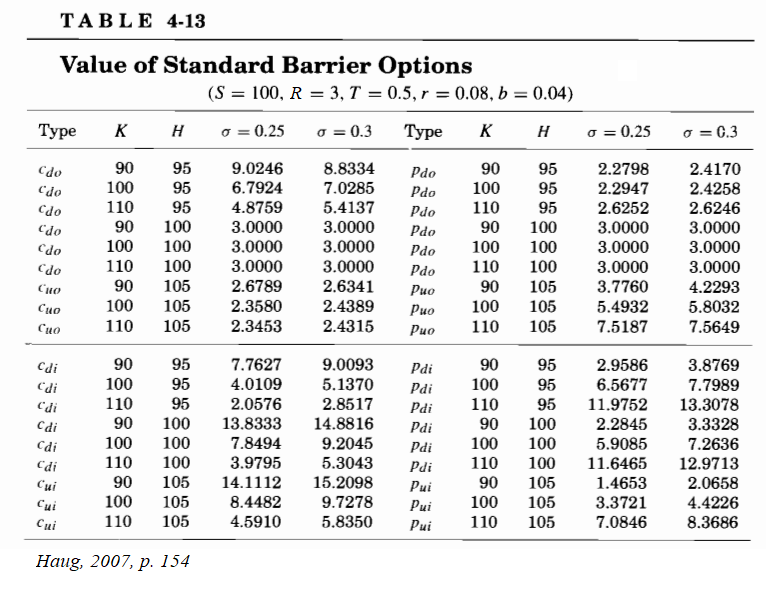

In [6]:
def get_barrier_table():
    sigmas = [0.25, 0.3]
    K_values = [90, 100, 110]
    H_values = [95, 100, 105]
    r = 0.08
    b = 0.04
    T = 0.5
    R = 3
    S = 100

    table = []
    for sigma in sigmas:
        for K in K_values:
            for H in H_values:
                for option_type in ["Down-and-out", "Down-and-in", "Up-and-out", "Up-and-in"]:
                    for is_call in [True, False]:
                        price = barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)
                        table.append({
                            "type": f"{'c' if is_call else 'p'}_{option_type[:1].lower()}{option_type[option_type.rfind("-")+1]}",
                            "K": K,
                            "H": H,
                            "sigma": sigma,
                            "price": price
                        })
    return pd.DataFrame(table)
df = get_barrier_table()

In [7]:
df

,type,K,H,sigma,price
0,c_do,90,95,0.25,9.024568
1,p_do,90,95,0.25,2.279838
2,c_di,90,95,0.25,7.762670
3,p_di,90,95,0.25,2.958582
4,c_uo,90,95,0.25,3.681457
...,...,...,...,...,...
139,p_di,110,105,0.30,12.463006
140,c_uo,110,105,0.30,2.431533
141,p_uo,110,105,0.30,7.564957
142,c_ui,110,105,0.30,5.835036


In [8]:
def plot_graphs():    
    options = df.type.unique()
    sigma = 0.3
    fig = plt.figure(figsize=(22, 15))

    # Define grid points for K and H
    K_values = [90, 100, 110]
    H_values = [95, 100, 105]
    K_grid, H_grid = np.meshgrid(K_values, H_values)

    for idx, option in enumerate(options):
        sub_df = df[(df.type == option) & (df.sigma == sigma)]
        price_grid = sub_df.price.values.reshape((len(H_values), len(K_values)))
        ax = fig.add_subplot(2, 4, idx + 1, projection="3d")
        surf = ax.plot_surface(K_grid, H_grid, price_grid, cmap="inferno", edgecolor="w", alpha=0.8)
        
        ax.set_title(f"Option type: {option}", fontsize=16, fontweight='bold', color='navy')
        ax.set_xlabel("K", fontsize=14, labelpad=10)
        ax.set_ylabel("H", fontsize=14, labelpad=10)
        ax.set_zlabel("Price", fontsize=14, labelpad=10)
        
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.1)
        
        ax.grid(True, linestyle="--", color="gray", alpha=0.5)

    plt.tight_layout()

    plt.show()

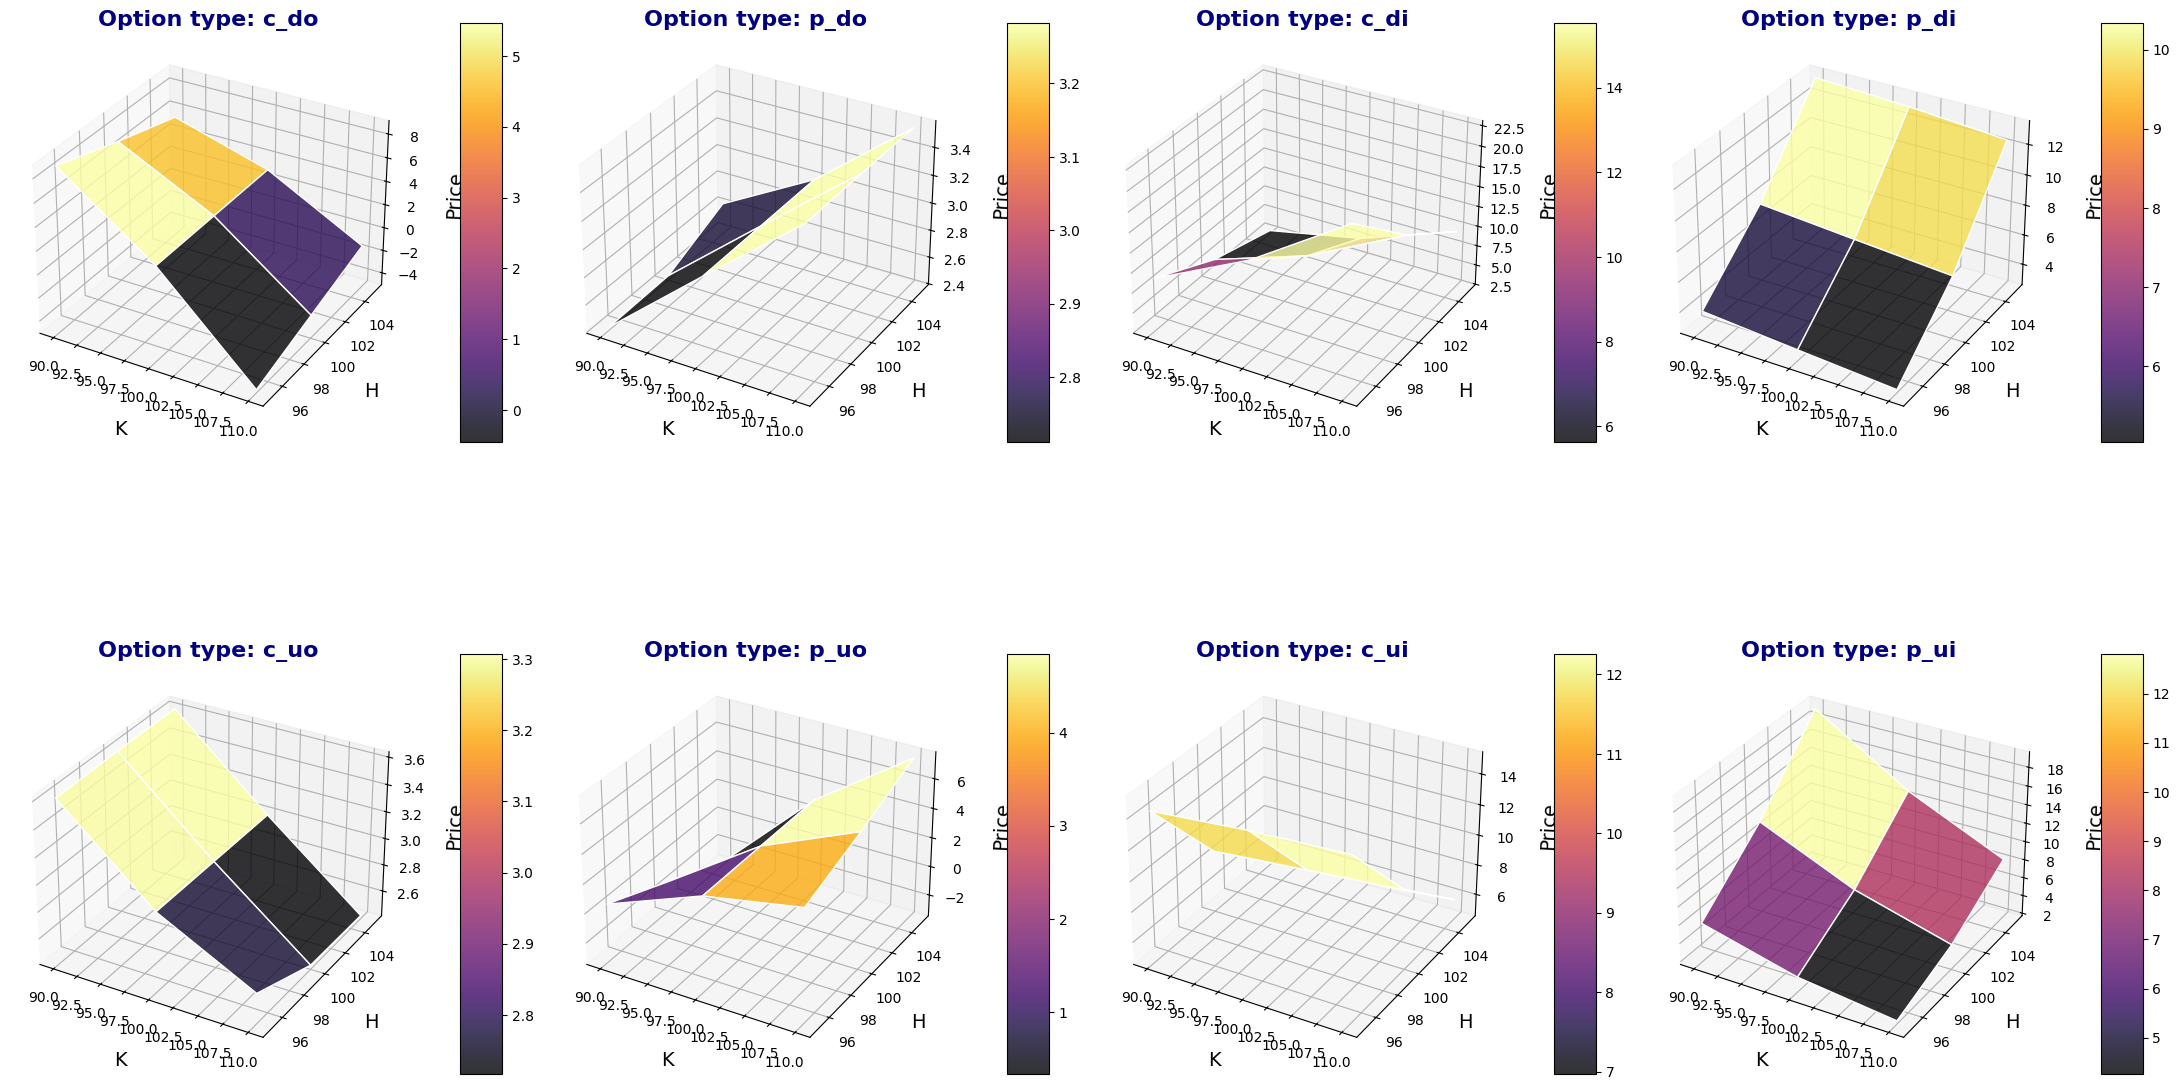

In [9]:
plot_graphs()

# Структурные продукты с полной защитой капитала

## СП с использованием барьерных опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день.

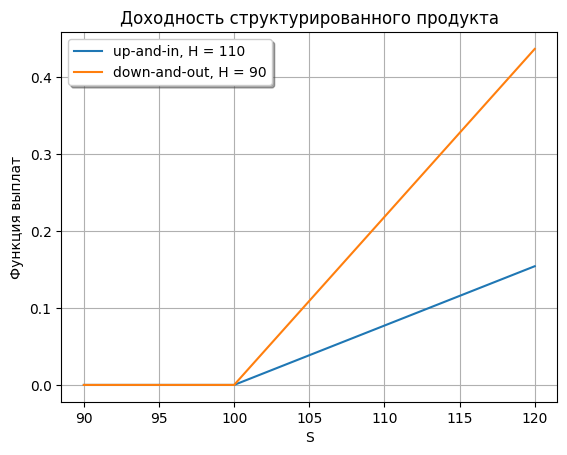

In [10]:
S0 = 100
T = 1
N = 100000
sigma = 0.3
r = 0.07
S_data = np.linspace(90, 120, 100)

H_1 = 110
K_1 = 105
option_type = 'Up-and-in'
is_call = True
call_1 = barrier_option(option_type, S0, H_1, K_1, 0, T, r, 0, sigma, is_call)

H_2 = 90
K_2 = 120
option_type = 'Down-and-out'
is_call = True
call_2 = barrier_option(option_type, S0, H_2, K_2, 0, T, r, 0, sigma, is_call)

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / call_1
PR_1 = K_1 * Q_1/ N
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_data - S0) / S0 )

Q_2 = (N - da) / call_2
PR_2 = K_2 * Q_2/ N
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_data - S0) / S0 )

plt.plot(S_data, r_sp_1, label = 'up-and-in, H = 110')
plt.plot(S_data, r_sp_2, label = 'down-and-out, H = 90')
plt.title('Доходность структурированного продукта')
plt.xlabel('S')
plt.ylabel('Функция выплат')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

## Задача

Задача. Сравните полученные результаты с функциями выплат, полученными при использовании гэп опционов, бинарных опционов (ЛБ2). Подкрепите выводы иллюстративными графиками.

Постройте зависимость стоимости барьерного опциона (Knock-out call, Knock-in call, Knock-out put Knock-in put) от расположения барьера: x – это барьер в процентах от цены (50, 500), y - стоимость барьерного опциона в % от стоимости обычного call.

Постройте графики зависимость КоУ от расположения барьера относительно страйка для продуктов: с knock-out call, knock-in call и ванильный кол; с knock-out put, knock-in put и ванильный call.

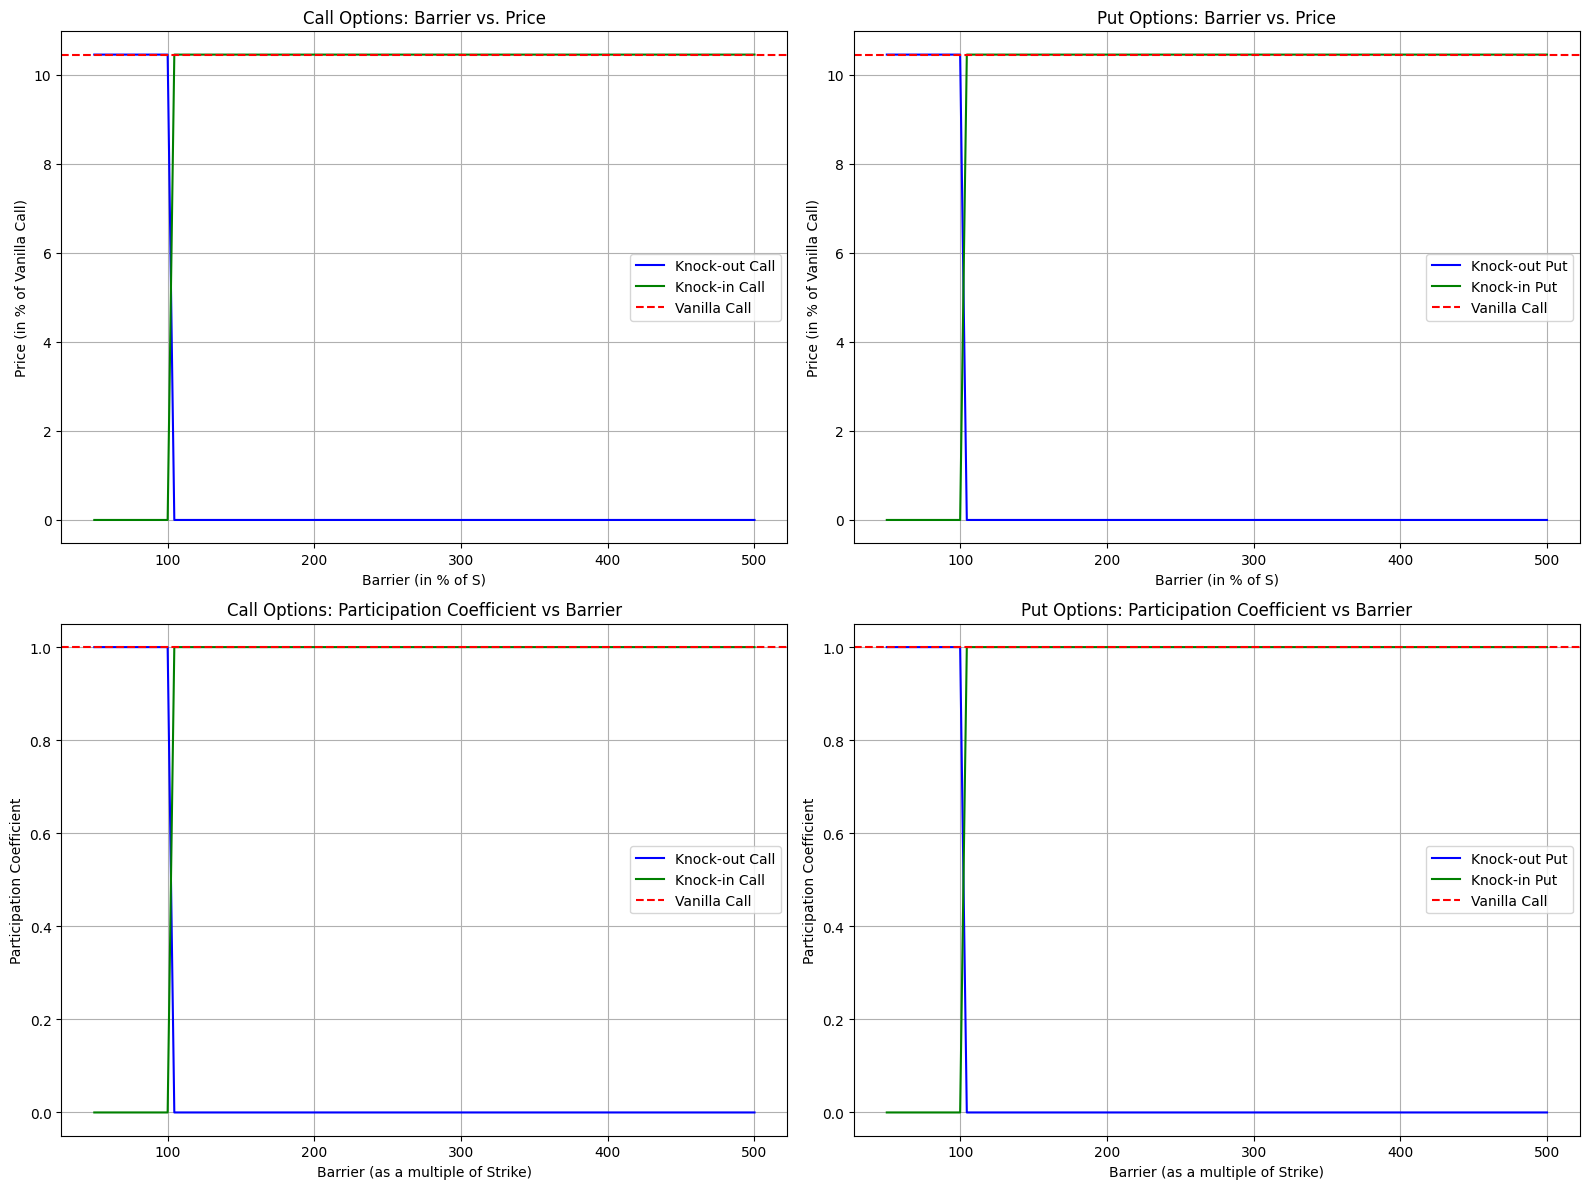

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def vanilla_call(S, K, T, sigma, r, q=0):
    d1_val = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2_val = d1_val - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)

def barrier_option_knock(S, K, H, T, sigma, r, is_call=True, is_knock_in=True, q=0):
    vanilla_price = vanilla_call(S, K, T, sigma, r, q) if is_call else vanilla_call(S, K, T, sigma, r, q)
    if is_knock_in:
        return vanilla_price if S < H else 0
    else:
        return vanilla_price if S >= H else 0

# Параметры
S = 100  # Текущая цена базового актива
K = 100  # Цена страйк
T = 1    # Время до экспирации (в годах)
r = 0.05 # Безрисковая ставка
q = 0.0  # Дивидендная доходность
sigma = 0.2  # Волатильность

# Диапазон значений барьера в процентах от текущей цены
barriers = np.linspace(50, 500, 100) / 100 * S

# Стоимость ванильного call опциона для сравнения
vanilla_call_price = vanilla_call(S, K, T, sigma, r, q=0)

# Рассчёт стоимости барьерных опционов
knock_out_call_prices = []
knock_in_call_prices = []
knock_out_put_prices = []
knock_in_put_prices = []

for H in barriers:
    knock_out_call_prices.append(barrier_option_knock(S, K, H, T, sigma, r, is_call=True, is_knock_in=False))
    knock_in_call_prices.append(barrier_option_knock(S, K, H, T, sigma, r, is_call=True, is_knock_in=True))
    knock_out_put_prices.append(barrier_option_knock(S, K, H, T, sigma, r, is_call=False, is_knock_in=False))
    knock_in_put_prices.append(barrier_option_knock(S, K, H, T, sigma, r, is_call=False, is_knock_in=True))

# Коэффициенты участия
knock_out_call_participation = np.array(knock_out_call_prices) / vanilla_call_price
knock_in_call_participation = np.array(knock_in_call_prices) / vanilla_call_price
knock_out_put_participation = np.array(knock_out_put_prices) / vanilla_call_price
knock_in_put_participation = np.array(knock_in_put_prices) / vanilla_call_price

# Исправление отображения графиков: использование сетки 2x2
plt.figure(figsize=(16, 12))

# Стоимость call опционов
plt.subplot(2, 2, 1)
plt.plot(barriers, knock_out_call_prices, label='Knock-out Call', color='blue')
plt.plot(barriers, knock_in_call_prices, label='Knock-in Call', color='green')
plt.axhline(y=vanilla_call_price, color='red', linestyle='--', label='Vanilla Call')
plt.title("Call Options: Barrier vs. Price")
plt.xlabel("Barrier (in % of S)")
plt.ylabel("Price (in % of Vanilla Call)")
plt.legend()
plt.grid()

# Стоимость put опционов
plt.subplot(2, 2, 2)
plt.plot(barriers, knock_out_put_prices, label='Knock-out Put', color='blue')
plt.plot(barriers, knock_in_put_prices, label='Knock-in Put', color='green')
plt.axhline(y=vanilla_call_price, color='red', linestyle='--', label='Vanilla Call')
plt.title("Put Options: Barrier vs. Price")
plt.xlabel("Barrier (in % of S)")
plt.ylabel("Price (in % of Vanilla Call)")
plt.legend()
plt.grid()

# КоУ для call опционов
plt.subplot(2, 2, 3)
plt.plot(barriers, knock_out_call_participation, label='Knock-out Call', color='blue')
plt.plot(barriers, knock_in_call_participation, label='Knock-in Call', color='green')
plt.axhline(y=1, color='red', linestyle='--', label='Vanilla Call')
plt.title("Call Options: Participation Coefficient vs Barrier")
plt.xlabel("Barrier (as a multiple of Strike)")
plt.ylabel("Participation Coefficient")
plt.legend()
plt.grid()

# КоУ для put опционов
plt.subplot(2, 2, 4)
plt.plot(barriers, knock_out_put_participation, label='Knock-out Put', color='blue')
plt.plot(barriers, knock_in_put_participation, label='Knock-in Put', color='green')
plt.axhline(y=1, color='red', linestyle='--', label='Vanilla Call')
plt.title("Put Options: Participation Coefficient vs Barrier")
plt.xlabel("Barrier (as a multiple of Strike)")
plt.ylabel("Participation Coefficient")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Торговая стратегия (индивидуально)

## Проект

Задача. Торговая стратегия на основе опционного контракта Callable Bull or Bear Contract (CBBC).


[CBBC](https://https://www.hkex.com.hk/-/media/HKEX-Market/Products/Securities/Structured-Products/Product-Sheet/ProductSheet_CBBC.pdf) -- барьерный инструмент с эффектом рычага, в котором отслеживается цена базового актива.
Покупка (продажа) контракта Callable Bull (Bear) подразумевает, что инвестор занял длинную (короткую) позицию по базовому активу и имеет право на прибыль, когда стоимость этого актива вырастет (упадет).

Для контракта на повышение цены (Сallable Bull) цена включения (тригер) устанавливается либо на уровне цены страйка, либо выше. Обязательное событие включения (Mandatory Call Even, MCE) происходит, когда цена базового актива достигает цены тригера. Когда это происходит, торговля контрактом прекращается, сам контракт отзывается, и держатель контракта получает компенсацию в соответствии с заранее установленными условиями. Для контракта на понижение цены, цена включения (тригер) устанавливается либо на уровне цены страйка, либо ниже.

Разработайте торговую стратегию:
1.  Постройте прогноз дневных максимумов и минимумов для базового актива (например, через регрессию).
1.  Сигнал на покупку генерируется, когда прогнозируемый дневной максимум не ниже цены контракта.
1.  Купите базовый актив, когда сигнал на покупку наблюдается в течение $m$ последовательных дней.
1.  Закройте длинную позицию, когда сигнал на покупку исчезает в течение $m$ последовательных дней, происходит MCE или истекает срок действия контракта CBBC.
1.  Если позиция закрывается до MCE и срока действия контракта, то повторите шаги 2–4.

Проварьируйте параметр $m$ и проанализируейте P&L торговой стратегии.

[Исторические данные CBBC](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)  

Статья ([Cheung et.al., 2010](https://www.sciencedirect.com/science/article/pii/S0927538X09000778?via%3Dihub)) или ([Cheung et.al., 2010](https://drive.google.com/file/d/1psFxTOZ8nf5IVuBcWKuKTEQ-JeJsRGPI/view?usp=drive_link))


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv(r'C:\Users\Mirom\Desktop\H&SFI\GSFP-labs\CBBC10.csv', encoding='utf-8', delimiter=';')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88378 entries, 0 to 88377
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CBBC Code                          88375 non-null  float64
 1   CBBC Name                          88375 non-null  object 
 2   Trade Date                         88375 non-null  object 
 3   No. of CBBC Bought *               88375 non-null  float64
 4   Average Price per CBBC Bought *    88375 non-null  float64
 5   No. of CBBC Sold *                 88375 non-null  float64
 6   Average Price per CBBC Sold *      88375 non-null  float64
 7   No. of CBBC still out in market *  88375 non-null  float64
 8   % of issue still out in market *   88375 non-null  float64
 9   Total Issue Size *                 88375 non-null  float64
 10  Trading Currency                   88375 non-null  object 
 11  Day High                           88375 non-null  flo

In [16]:
data.head()

,CBBC Code,CBBC Name,Trade Date,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,...,CBBC Category,Listing Date,Last Trading Date,Maturity Date,MCE,Strike/Call Currency,Strike Level,Call Level,Ent. Ratio^,Delisting Date**
0,49546.0,SG#S&P RC2512A,31.10.2024,0.0,0.000000,0.0,0.000000,1300000.0,1.30,100000000.0,...,R,25.01.2024,-,19.12.2025,N,-,4550.0,4600.0,31200.0,-
1,49562.0,SG#DJIA RP2603B,31.10.2024,30000.0,0.028000,-2890000.0,-0.029502,19180000.0,12.79,150000000.0,...,R,30.01.2024,2024-11-07,20.03.2026,Y,-,43850.0,43500.0,390000.0,2024-11-08
2,49581.0,UB#DJIA RC2503A,31.10.2024,0.0,0.000000,0.0,0.000000,10000.0,0.01,100000000.0,...,R,21.02.2024,-,21.03.2025,N,-,33400.0,33800.0,312000.0,-
3,49582.0,UB#NQ100RC2503A,31.10.2024,0.0,0.000000,0.0,0.000000,1760000.0,1.76,100000000.0,...,R,21.02.2024,-,21.03.2025,N,-,15250.0,15500.0,156000.0,-
4,49596.0,JP#DJIA RP2512A,31.10.2024,480000.0,0.036542,-150000.0,-0.039000,15090000.0,15.09,100000000.0,...,R,29.02.2024,2024-11-11,19.12.2025,Y,-,44400.0,44000.0,390000.0,2024-11-12


In [17]:
data = data.sort_values(by='Trade Date')
print(data['Trade Date'].nunique())

21


In [18]:
data['Trade Date'] = pd.to_datetime(data['Trade Date'], dayfirst=True)

In [19]:
data['Day High'] = data['Day High'].ffill()
data['Day Low'] = data['Day Low'].ffill()

In [20]:
data

,CBBC Code,CBBC Name,Trade Date,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,...,CBBC Category,Listing Date,Last Trading Date,Maturity Date,MCE,Strike/Call Currency,Strike Level,Call Level,Ent. Ratio^,Delisting Date**
88374,69999.0,JP#HSI RC2708D,2024-10-02,0.000000e+00,0.000000,-2.270000e+06,-0.430044,2560000.0,1.28,200000000.0,...,R,19.09.2024,-,30.08.2027,N,-,17080.00,17180.0,10000.0,-
86126,51617.0,UB#TENCTRC25067,2024-10-02,4.050000e+05,0.098753,-8.550000e+05,-0.105515,450000.0,0.45,100000000.0,...,R,02.10.2024,2024-10-15,13.06.2025,Y,HKD,417.20,420.0,500.0,2024-10-16
86125,51616.0,UB#TENCTRC25066,2024-10-02,1.550000e+06,0.084603,-3.375000e+07,-0.099994,32200000.0,32.20,100000000.0,...,R,02.10.2024,2024-10-09,27.06.2025,Y,HKD,425.00,428.0,500.0,2024-10-10
86124,51615.0,UB#HSBC RC2704B,2024-10-02,1.888000e+06,0.021633,-2.292000e+06,-0.022545,404000.0,0.51,80000000.0,...,R,02.10.2024,-,06.04.2027,N,HKD,66.42,67.0,100.0,-
86123,51614.0,UB#CMB RC2707A,2024-10-02,3.000000e+04,0.073667,-2.834500e+07,-0.084839,28315000.0,35.39,80000000.0,...,R,02.10.2024,2024-11-22,29.07.2027,Y,HKD,34.60,35.0,100.0,2024-11-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,57802.0,SG#HSI RC2710F,2024-10-31,1.661970e+09,0.056422,-1.678370e+09,-0.056474,17150000.0,8.58,200000000.0,...,R,29.10.2024,2024-11-12,28.10.2027,Y,-,19948.00,20048.0,10000.0,2024-11-13
0,49546.0,SG#S&P RC2512A,2024-10-31,0.000000e+00,0.000000,0.000000e+00,0.000000,1300000.0,1.30,100000000.0,...,R,25.01.2024,-,19.12.2025,N,-,4550.00,4600.0,31200.0,-
88375,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88376,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Прогнозирование дневных максимумов и минимумов
def forecast_high_low(df, n_lags=5):
    # Создание лаговых признаков
    df['High_Lag'] = df['Day High'].shift(1)
    df['Low_Lag'] = df['Day Low'].shift(1)
    
    # Удаление строк с пропущенными значениями
    df = df.dropna(subset=['High_Lag', 'Low_Lag']).copy()
    
    X = df[['High_Lag', 'Low_Lag']]
    y_high = df['Day High']
    y_low = df['Day Low']
    
    # Модель линейной регрессии для прогнозирования High
    model_high = LinearRegression()
    model_high.fit(X, y_high)
    df['High_Forecast'] = model_high.predict(X)
    
    # Модель линейной регрессии для прогнозирования Low
    model_low = LinearRegression()
    model_low.fit(X, y_low)
    df['Low_Forecast'] = model_low.predict(X)
    
    return df

# Генерация сигналов на покупку и продажу
def generate_signals(df):
    # Сигнал на покупку
    df['Buy Signal'] = df['High_Forecast'] >= df['Call Level']
    # Сигнал на продажу
    df['Sell Signal'] = df['Low_Forecast'] <= df['Call Level']
    return df

# Торговая стратегия
def trading_strategy(df, m=3):
    position = None  # None — нет позиции, 1 — длинная, -1 — короткая
    entry_day = None
    profits = []

    for i in range(len(df)):
        # Проверка наличия позиции
        if position is None:
            # Проверка на покупку
            if df['Buy Signal'].iloc[i:i+m].all():
                position = 1  # Открытие длинной позиции
                entry_day = i
            # Проверка на продажу
            elif df['Sell Signal'].iloc[i:i+m].all():
                position = -1  # Открытие короткой позиции
                entry_day = i
        elif position == 1:
            # Закрытие длинной позиции
            if (not df['Buy Signal'].iloc[i:i+m].all() or
                df['Maturity Date'].iloc[i] != '-' or
                df['MCE'].iloc[i] == 'Y'):
                profits.append(df['Day High'].iloc[i] - df['Day High'].iloc[entry_day])
                position = None  # Закрытие позиции
        elif position == -1:
            # Закрытие короткой позиции
            if (not df['Sell Signal'].iloc[i:i+m].all() or
                df['Maturity Date'].iloc[i] != '-' or
                df['MCE'].iloc[i] == 'Y'):
                profits.append(df['Day High'].iloc[entry_day] - df['Day High'].iloc[i])
                position = None  # Закрытие позиции

    return profits

m = 1: Total Profit/Loss = 59.31
m = 2: Total Profit/Loss = 59.31
m = 3: Total Profit/Loss = 59.25
m = 4: Total Profit/Loss = 59.25
m = 5: Total Profit/Loss = 59.32


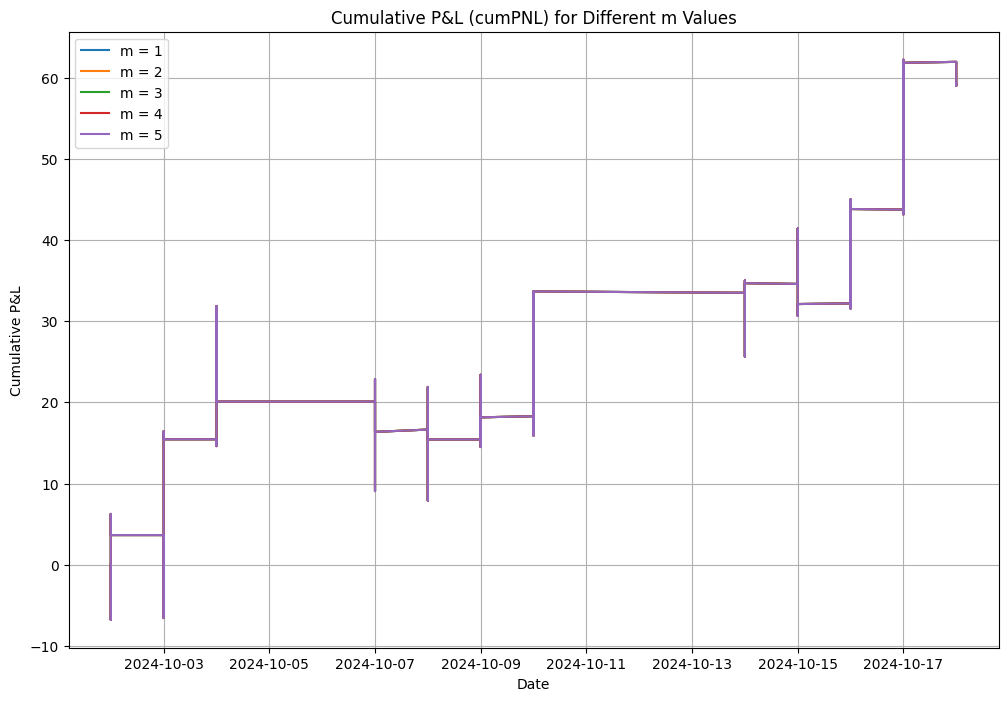

In [22]:
# Применение функций
data = forecast_high_low(data)
data = generate_signals(data)

# Настройка оси времени для графика
plt.figure(figsize=(12, 8))
for m in range(1, 6):
    profits = trading_strategy(data, m=m)
    cumulative_pnl = np.cumsum(profits)
    dates = data['Trade Date'].iloc[:len(cumulative_pnl)]  # Привязка к датам
    print(f"m = {m}: Total Profit/Loss = {sum(profits):.2f}")
    plt.plot(dates, cumulative_pnl, label=f"m = {m}")
    
plt.title("Cumulative P&L (cumPNL) for Different m Values")
plt.xlabel("Date")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.grid()
plt.show()

# Примеры на барьерные опционы

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [23]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95

d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.7338748685456857
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [24]:
K = 92
call = barrier_option('Down-and-in',S, H, K, R, T, r, b, sigma, is_call=True)
print(f"call price = {call}")


call price = 4.892727517998941
